In [1]:
!pip install opendatasets

In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/salader/dogs-vs-cats")

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats


100%|██████████| 1.06G/1.06G [00:06<00:00, 181MB/s]


In [4]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Dropout

In [6]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True
)

Found 20000 files belonging to 2 classes.


In [7]:
# # for _, y in train_ds.take(1):
# #   print(_)
# for _, y in train_ds.take(2):
#   print(_.shape)

In [8]:
#generators
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    shuffle=False
)

Found 5000 files belonging to 2 classes.


In [9]:
def process(image, label):
    image = tf.cast(image/255., tf.float32)
    return image, label

In [10]:
train_ds= train_ds.map(process)
test_ds = test_ds.map(process)

In [11]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='valid', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(train_ds, validation_data=test_ds, epochs=10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 81ms/step - accuracy: 0.5561 - loss: 2.3752 - val_accuracy: 0.5174 - val_loss: 0.6877
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 78ms/step - accuracy: 0.6141 - loss: 0.6592 - val_accuracy: 0.7084 - val_loss: 0.5744
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - accuracy: 0.7015 - loss: 0.5641 - val_accuracy: 0.7346 - val_loss: 0.5320
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.7597 - loss: 0.4919 - val_accuracy: 0.7182 - val_loss: 0.5510
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 77ms/step - accuracy: 0.7929 - loss: 0.4364 - val_accuracy: 0.7792 - val_loss: 0.4716
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.8252 - loss: 0.3812 - val_accuracy: 0.7710 - val_loss: 0.5376
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.8475 - loss: 0.3407 - val_accuracy: 0.7664 - val_loss: 0.5066
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.8778 - loss: 0.2715 - 

In [14]:
import matplotlib.pyplot as plt

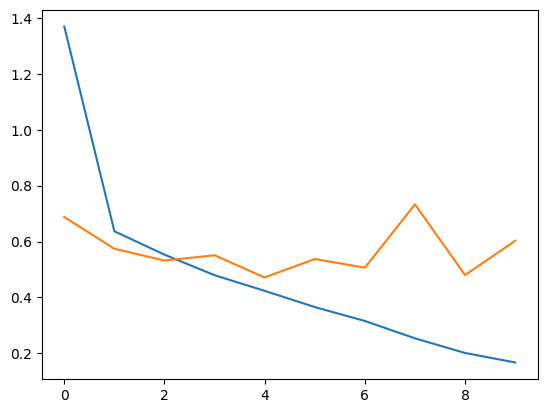

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

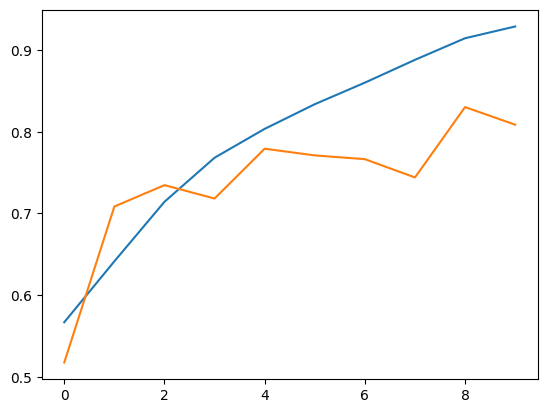

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [17]:
# y_test = np.concatenate([y.numpy() for x, y in test_ds], axis=0)
y_prob = model.predict(test_ds)

157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step


In [18]:
y_prob.shape

(5000, 1)

In [19]:
import numpy as np

In [20]:
y_pred = np.where(y_prob > 0.5, 1, 0)

In [21]:
y_test = []
for _, labels in test_ds:
    y_test.extend(labels.numpy())

y_test = np.array(y_test)


In [22]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

In [23]:
from sklearn.metrics import classification_report, accuracy_score

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2500
           1       0.80      0.83      0.81      2500

    accuracy                           0.81      5000
   macro avg       0.81      0.81      0.81      5000
weighted avg       0.81      0.81      0.81      5000



In [26]:
import matplotlib.pyplot as plt
import cv2

In [27]:
test_img = cv2.imread('/content/th.jpg')

In [32]:
test_img = cv2.resize(test_img, (256, 256))/255.

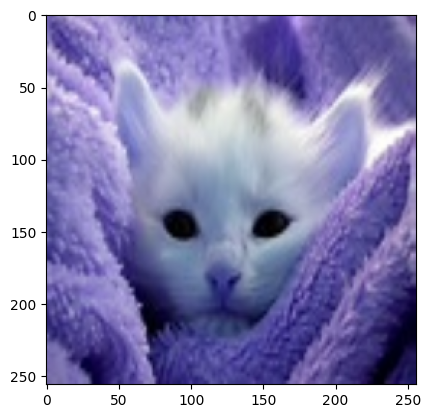

In [33]:
plt.imshow(test_img)

In [34]:
test_input = test_img.reshape(1, 256, 256, 3)

In [35]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.00730588]], dtype=float32)

In [36]:
test_img = cv2.imread('/content/th.jpg')

In [38]:
test_img = cv2.resize(test_img, (256, 256))/255.

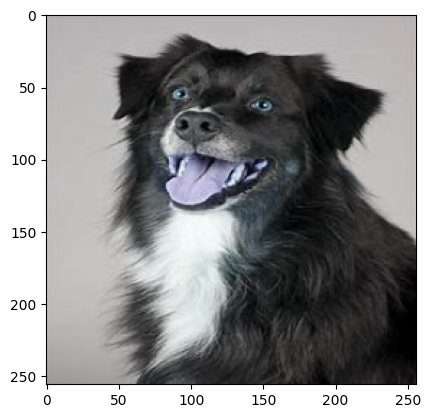

In [39]:
plt.imshow(test_img)

In [40]:
test_input = test_img.reshape(1, 256, 256, 3)

In [42]:
model.predict(test_input).round(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[1.]], dtype=float32)